# Scenarios

The scenarios are taken from https://twiki.cern.ch/twiki/bin/view/LHCPhysics/SUSYCrossSections.

Modifications:
-   we set the STAUMIX values to maximally mixed for sleptons
-   we manually set the massses of all particles tagged with an @a or {M...} 

In [2]:
#%load_ext nb_black
import hepi


print(hepi.__version__)
import smpl
from smpl import data
import numpy as np
import hepi.resummino as rs
import hepi.util as util
import matplotlib.pyplot as plt

rs.set_path("~/git/resummino/build/bin/resummino")
print(rs.default_resummino_runner.get_version())
print(rs.get_path())

test_lo = True
analyse  = True # else generation

dirty
resummino 3.1.1-dev
~/git/resummino/build/bin/resummino


# aNNLO+NNLL wino


/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.......= 7 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 269.71it/s]


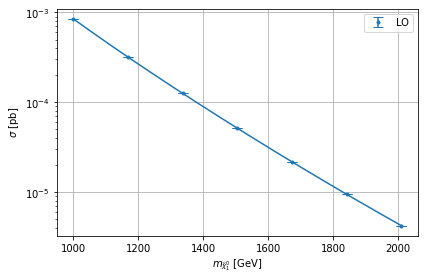

In [7]:
params = [
    "wino.slha",
]
energies = [13000,
            #13600
           ]
pss = [
    ( 1000023, +1000024),  # N1C1p
    #( 1000023, -1000024),  # N1C1m
    #(+1000024, -1000024),  # C1pC1m
]
pdfs = ["PDF4LHC21_40"]
for energy in energies:
    for pa, pb in pss:
        for pdf in pdfs:
            hepi.set_output_dir(
                "demo_output_" + str(energy) + "_wino_" + str(pa) + "_" + str(pb) + "_" + pdf+ "/"
            )
            rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
            for param in params:
                i = hepi.Input(
                    hepi.Order.LO if test_lo else hepi.Order.aNNLO_PLUS_NNLL,
                    energy,
                    pa,
                    pb,
                    param,
                    pdf,
                    pdf,
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
                li = [i]
                li = hepi.masses_scan(
                    li,
                    [
                        1000022,
                        1000023,
                        1000024,
                    ],
                    np.linspace(1000,2010,7),
                )
                if not test_lo:

                    li = hepi.seven_point_scan(li)
                    li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                    if not analyse:
                        rs_dl = rs.run(li, skip=False, run=False, parse=False)
                    else:
                        rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                        rs_dl = hepi.pdf_errors(li,rs_dl)
                        rs_dl = hepi.scale_errors(li,rs_dl)
                        rs_dl = hepi.combine_errors(rs_dl)
                        hepi.title(li[0])
                        #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                        #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_SCALE",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"aNNLO_PLUS_NNLL_PDF",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),ratio=True,show=True,logy=False,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        
                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True)
                    hepi.mass_plot(rs_dl,"LO",1000022,show=True,interpolator='cubic',pre=np.log,post=np.exp)

In [6]:
rs_dl

,LO,NLO,NLO_PLUS_NLL,aNNLO_PLUS_NNLL,K_LO,K_NLO,K_NLO_PLUS_NLL,NLO_PLUS_NLL_OVER_NLO,K_aNNLO_PLUS_NNLL,aNNLO_PLUS_NNLL_OVER_NLO,...,max_iters,invariant_mass,pt,result,id,model,mu,mass_1000022_1000023_1000024,runner,mass_1000022
0,0.00084881+/-0.00000032,0.0+/-0,0.0+/-0,None,1.0+/-0,0.0+/-0,0.0+/-0,None,None,None,...,50,auto,auto,total,0.0.0,,1000.000000,1000.000000,ResumminoRunner-resummino 3.1.1-dev,1000.000000
1,0.00031883+/-0.00000012,0.0+/-0,0.0+/-0,None,1.0+/-0,0.0+/-0,0.0+/-0,None,None,None,...,50,auto,auto,total,0.0.0,,1168.333333,1168.333333,ResumminoRunner-resummino 3.1.1-dev,1168.333333
2,0.00012577+/-0.00000005,0.0+/-0,0.0+/-0,None,1.0+/-0,0.0+/-0,0.0+/-0,None,None,None,...,50,auto,auto,total,0.0.0,,1336.666667,1336.666667,ResumminoRunner-resummino 3.1.1-dev,1336.666667
3,(5.1490+/-0.0019)e-05,0.0+/-0,0.0+/-0,None,1.0+/-0,0.0+/-0,0.0+/-0,None,None,None,...,50,auto,auto,total,0.0.0,,1505.000000,1505.000000,ResumminoRunner-resummino 3.1.1-dev,1505.000000
4,(2.1751+/-0.0008)e-05,0.0+/-0,0.0+/-0,None,1.0+/-0,0.0+/-0,0.0+/-0,None,None,None,...,50,auto,auto,total,0.0.0,,1673.333333,1673.333333,ResumminoRunner-resummino 3.1.1-dev,1673.333333
5,(9.4624+/-0.0035)e-06,0.0+/-0,0.0+/-0,None,1.0+/-0,0.0+/-0,0.0+/-0,None,None,None,...,50,auto,auto,total,0.0.0,,1841.666667,1841.666667,ResumminoRunner-resummino 3.1.1-dev,1841.666667
6,(4.2408+/-0.0015)e-06,0.0+/-0,0.0+/-0,None,1.00000000000000000000+/-0.00000000000000000004,0.0+/-0,0.0+/-0,None,None,None,...,50,auto,auto,total,0.0.0,,2010.000000,2010.000000,ResumminoRunner-resummino 3.1.1-dev,2010.000000


# NLO+NLL wino


/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


...............................................................................................................= 111 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 111/111 [00:00<00:00, 212.76it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.038222858640920225% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03935899883790293% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.04302339315572162% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:239: RuntimeWarning: too bad numerical precision vs scale @ num:NLO_PLUS_NLL 0.13891286389768187% vs scale:0.8694896505925649% to -2.6375819204339237%
  warnings.warn(


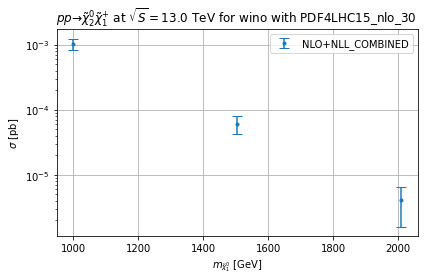

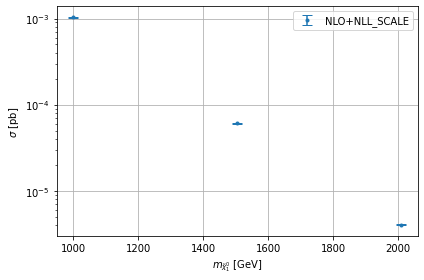

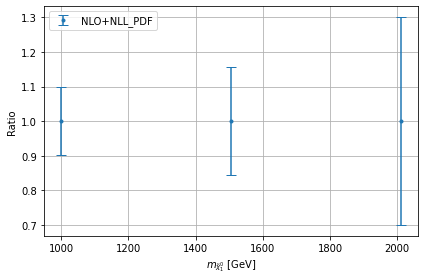

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


...................................................................................................................................................................................................= 195 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 334.41it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.038002646619275195% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.037457542113956487% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03705890070026622% vs 0.0% to pdf: -0.0%
  warnings.warn(


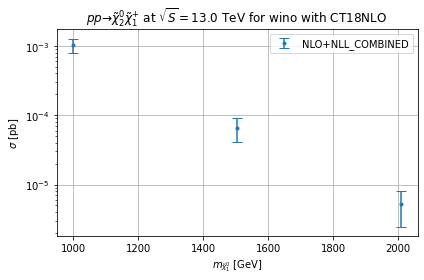

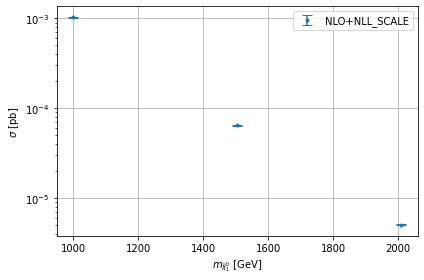

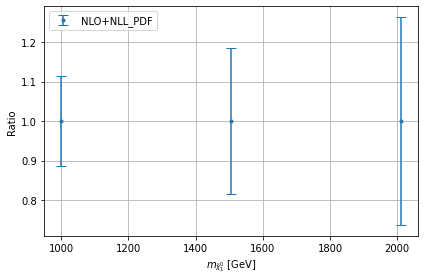

/home/apn/.local/lib/python3.9/site-packages/hepi/input.py:283: RuntimeWarning: Could not set new central scale to average of masses.
  warnings.warn("Could not set new central scale to average of masses.",


.....................................................................................................................................................................................................................= 213 jobs


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 301.39it/s]
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.038135141614718725% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.03945767968092352% vs 0.0% to pdf: -0.0%
  warnings.warn(
/home/apn/.local/lib/python3.9/site-packages/hepi/results.py:156: RuntimeWarning: too bad numerical precision vs pdf @ LO num: 0.04097140776755224% vs 0.0% to pdf: -0.0%
  warnings.warn(


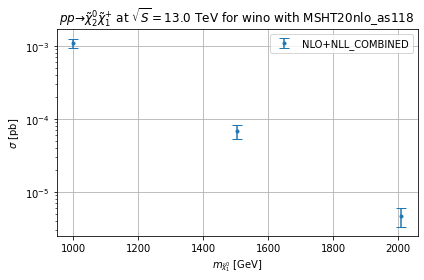

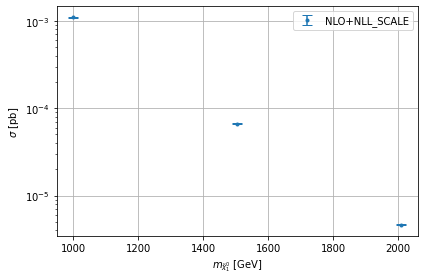

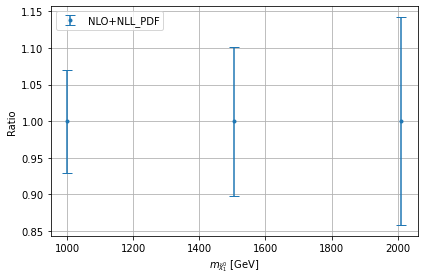

In [3]:
params = [
    "wino.slha",
]
pss = [
    ( 1000023, +1000024),  # N1C1p
    #( 1000022, -1000024),  # N1C1m
    #(+1000024, -1000024),  # C1pC1m
]
energies = [13000,
            #13600
           ]
pdfs = ["PDF4LHC15_nlo_30",
    "CT18NLO","MSHT20nlo_as118"]

for energy in energies:
    for pa, pb in pss:
        for pdf in pdfs:
            hepi.set_output_dir(
                "output_" + str(energy) + "_wino_" + str(pa) + "_" + str(pb) + "_" + pdf+ "/"
            )
            rs.default_resummino_runner.set_output_dir(hepi.get_output_dir())
            for param in params:
                i = hepi.Input(
                    hepi.Order.LO if test_lo else hepi.Order.NLO_PLUS_NLL,
                    energy,
                    pa,
                    pb,
                    param,
                    pdf,
                    pdf,
                    1.0,
                    1.0,
                    id="0.0.0",
                    precision=0.001,
                    max_iters=50,
                )
                li = [i]
                li = hepi.masses_scan(
                    li,
                    [
                        1000022,
                        1000023,
                        1000024,
                    ],
                    np.linspace(1000,2010,3),
                )
                if not test_lo:

                    li = hepi.seven_point_scan(li)
                    li = hepi.pdf_scan(li)
                    # li = hepi.change_where(li, {"precision": 0.0001, "max_iters": 200}, pdfset_nlo=0)
                    if not analyse:
                        rs_dl = rs.run(li, skip=False, run=False, parse=False)
                    else:
                        rs_dl = rs.run(li, skip=True, run=True, parse=True,ignore_error=True)
                        rs_dl = hepi.pdf_errors(li,rs_dl,["LO","NLO","NLO_PLUS_NLL"])
                        rs_dl = hepi.scale_errors(li,rs_dl,["LO","NLO","NLO_PLUS_NLL"])
                        rs_dl = hepi.combine_errors(rs_dl,["LO","NLO","NLO_PLUS_NLL"])
                        hepi.title(li[0])
                        #hepi.mass_plot(rs_dl,"LO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp)
                        #hepi.mass_plot(rs_dl,"NLO_COMBINED",1000022,mask = rs_dl["aNNLO_PLUS_NNLL_COMBINED"].notnull(),show=True,logy=True,interpolate=True,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"NLO_PLUS_NLL_COMBINED",1000022,mask = rs_dl["NLO_PLUS_NLL_COMBINED"].notnull(),show=True,logy=True,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"NLO_PLUS_NLL_SCALE",1000022,mask = rs_dl["NLO_PLUS_NLL_COMBINED"].notnull(),show=True,logy=True,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)
                        hepi.mass_plot(rs_dl,"NLO_PLUS_NLL_PDF",1000022,mask = rs_dl["NLO_PLUS_NLL_COMBINED"].notnull(),ratio=True,show=True,logy=False,interpolate=False,fill=True,interpolator='cubic',pre=np.log,post=np.exp,init=False)

                else:
                    rs_dl = rs.run(li, skip=True, run=True, parse=True)
                    hepi.mass_plot(rs_dl,"LO",1000022,show=True,interpolator='cubic',pre=np.log,post=np.exp)